In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [5]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [8]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,0,1,50047,10,YES
1,YES,2,1,134075,18,YES
2,NO,1,1,160205,30,YES
3,YES,0,1,193264,15,YES
4,NO,1,1,27533,28,NO


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,YES
1,1,2,1,134075,18,YES
2,0,1,1,160205,30,YES
3,1,0,1,193264,15,YES
4,0,1,1,27533,28,NO


In [11]:
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0


In [12]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [13]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [14]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])

In [15]:
df.head()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0


In [16]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [17]:
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1


In [18]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

In [19]:
Y=pd.DataFrame(Y)
Y

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((480, 5), (480, 1), (120, 5), (120, 1))

In [22]:
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=5,random_state=12)
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=12)

In [23]:
y_test_pred=dt.predict(x_test)
y_test

,Taxable.Income
227,1
33,1
293,1
574,1
97,1
...,...
222,1
446,0
172,0
536,1


In [24]:
score=cross_val_score(dt,x_train,y_train,cv=10)
score.mean()

0.6395833333333333

In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.18      0.25      0.21        24
           1       0.79      0.72      0.75        96

    accuracy                           0.62       120
   macro avg       0.49      0.48      0.48       120
weighted avg       0.67      0.62      0.65       120



In [26]:
df.columns

Index(['Taxable.Income', 'Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

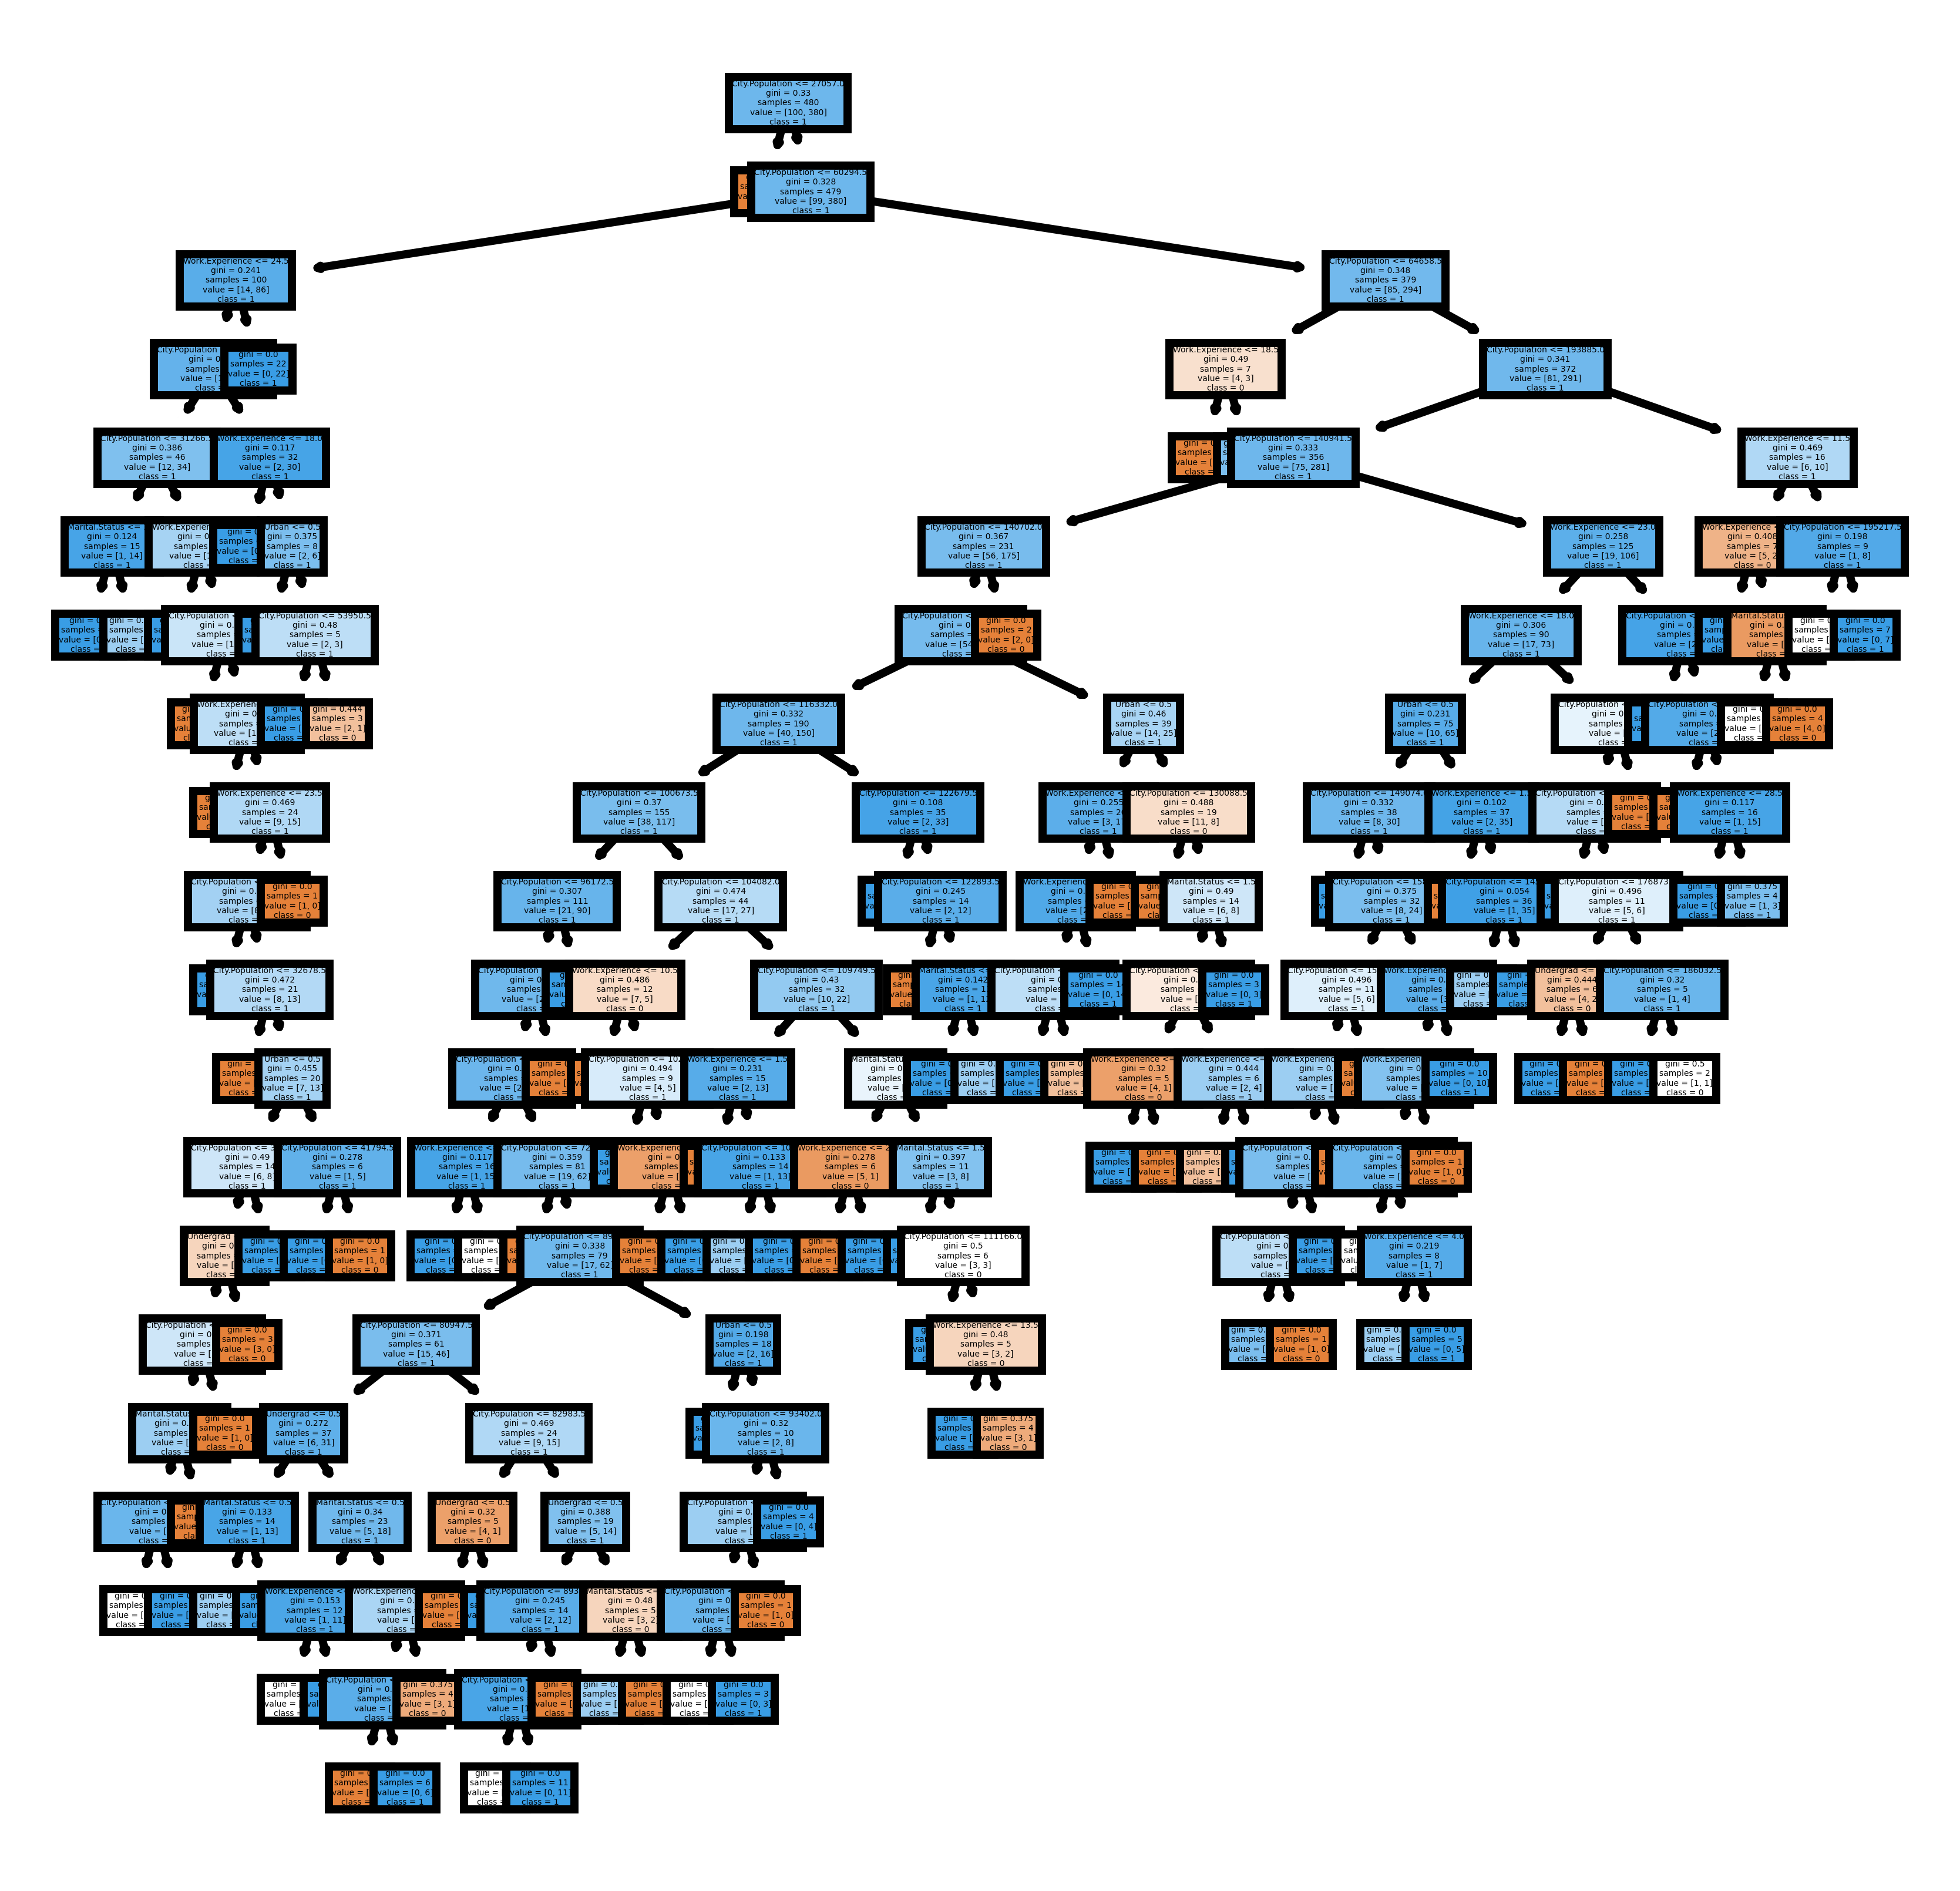

In [27]:
fn=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
cn=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()